In [5]:
# Base
import os
import re
import math
import mglearn
import datetime
from time import time
from tqdm import tqdm
import numpy as np  # linear algebra
from scipy import stats
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

#Pandas Config.
#For the default setting: reset_option(param) 
import pandas as pd  # read and wrangle dataframes
pd.set_option("display.max_rows", 100) 
pd.set_option('display.max_columns', 30) #None for the entire columns
pd.set_option('display.max_colwidth', 1000) #None for the entire columns
pd.set_option('display.precision', 3) #precision in terms of decimal places

#Matplotlib Config.
import matplotlib
import matplotlib.pyplot as plt # visualization
from matplotlib import font_manager, rc
matplotlib.style.use('ggplot')  #fivethirtyeightb, seaborn
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.family'] = 'serif'  #serif
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['axes.unicode_minus'] = False  #마이너스 깨짐 현상
# rc('font', family='AppleGothic')  #Default 한글폰트
%matplotlib inline 

#Seaborn Config.
import seaborn as sns # statistical visualizations and aesthetics
sns.set_style('whitegrid')
sns.set_context("notebook", rc={"grid.linewidth": 0.6})

%autosave 120

Autosaving every 120 seconds


In [6]:
#Data Transformation
# data preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import (StandardScaler,
                                   MinMaxScaler,
                                   RobustScaler,
                                   OneHotEncoder,
                                   LabelEncoder, 
                                   Imputer)


# feature selection
from sklearn.feature_selection import SelectFromModel


# model evaluation
from sklearn.model_selection import (KFold,
                                     train_test_split, 
                                     StratifiedShuffleSplit,
                                     cross_validate,
                                     cross_val_score,
                                     cross_val_predict, 
                                     learning_curve,
                                     validation_curve,
                                     GridSearchCV,
                                     RandomizedSearchCV)

In [7]:
#ML
# metrics
from sklearn.metrics import (accuracy_score,
                             average_precision_score,
                             confusion_matrix,
                             log_loss,
                             roc_auc_score,
                             roc_curve,
                             mean_absolute_error,
                             mean_squared_error,
                             r2_score)

# persist final model pipeline
from sklearn.externals import joblib


# scikit-learn pipelines
from sklearn.pipeline import make_pipeline, FeatureUnion


# base class
from sklearn.base import BaseEstimator, TransformerMixin


# models: Regressor
from sklearn.linear_model import (Lasso, LassoCV, Ridge, LinearRegression)
from sklearn.svm import SVR
from sklearn.ensemble import (RandomForestRegressor, BaggingRegressor)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# models: Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier)
from xgboost import (XGBClassifier, plot_importance)
from lightgbm import (LGBMClassifier, plot_importance)

# Data: Predicting Boston Housing Price 

In [8]:
from sklearn.datasets import load_boston  #load_wine, load_boston, fetch_california_housing

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = pd.DataFrame(boston.target, columns=["MEDV"])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.0,2.31,0.0,0.538,6.575,65.2,4.090,1.0,296.0,15.3,396.90,4.98,24.0
1,0.027,0.0,7.07,0.0,0.469,6.421,78.9,4.967,2.0,242.0,17.8,396.90,9.14,21.6
2,0.027,0.0,7.07,0.0,0.469,7.185,61.1,4.967,2.0,242.0,17.8,392.83,4.03,34.7
3,0.032,0.0,2.18,0.0,0.458,6.998,45.8,6.062,3.0,222.0,18.7,394.63,2.94,33.4
4,0.069,0.0,2.18,0.0,0.458,7.147,54.2,6.062,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
features = df.columns[:-1].tolist()
X = df[features]
y = df['MEDV']
# X = df[features].values
# y = df['MEDV'].values.reshape(-1,1)

In [11]:
N = len(df)
ratio = 0.7
seed = 42

In [12]:
pd.melt(X)

,variable,value
0,CRIM,0.006
1,CRIM,0.027
2,CRIM,0.027
3,CRIM,0.032
4,CRIM,0.069
...,...,...
6573,LSTAT,9.670
6574,LSTAT,9.080
6575,LSTAT,5.640
6576,LSTAT,6.480


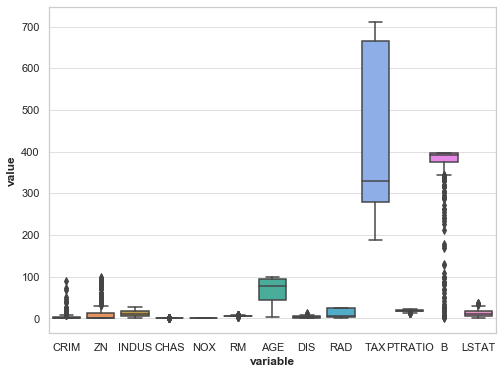

In [13]:
plt.figure(figsize=(8,6))
sns.boxplot(x="variable", y="value", data=pd.melt(X));

In [14]:
correlations = df.corr()['MEDV'].drop('MEDV')
print(correlations)

CRIM      -0.388
ZN         0.360
INDUS     -0.484
CHAS       0.175
NOX       -0.427
RM         0.695
AGE       -0.377
DIS        0.250
RAD       -0.382
TAX       -0.469
PTRATIO   -0.508
B          0.333
LSTAT     -0.738
Name: MEDV, dtype: float64


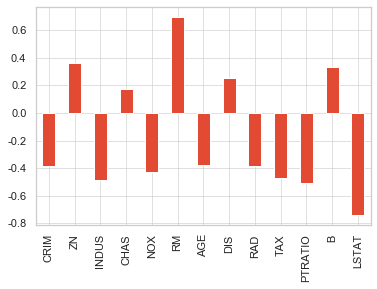

In [15]:
_ = correlations.plot(kind='bar')

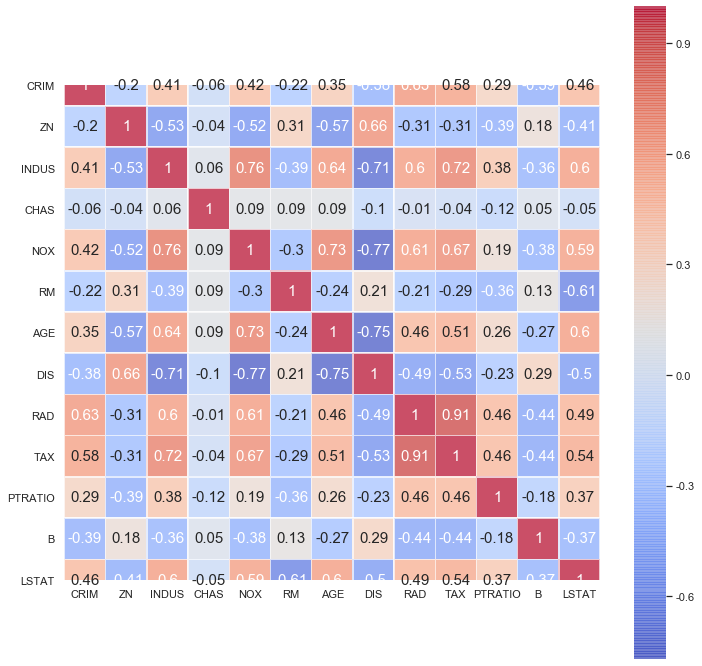

In [16]:
plt.subplots(figsize=(12,12))

sns.set()
sns.heatmap(X.corr().round(2), 
            cmap="coolwarm",
            linewidths=.5,
            alpha=.7,
            annot_kws={'size': 15},
            square=True,
            cbar=True,
            annot=True
);

# 과적합 문제(Overfitting)

- 분석 모델은 학습용 데이터셋을 학습하여 예측하고자하는 변수의 값을 예측한다. 이렇게 학습에 쓰이지 않은 표본데이터셋의 변수를 얼마나 잘 예측하는가를 검사하는 것을 Out-of-Sample-Tesing 혹은 Cross Validation이라고 한다.
- 일반적으로 표본내 성능과 표본외 성능은 비슷한 수준을 보이지만 경우에 따라서는 표본내 성능은 좋으면서 표본외 성능이 상대적으로 많이 떨어지는 수도 있다. 이러한 경우를 과최적화(overfitting)라고 한다. 
- 과최적화가 발생하면 학습에 쓰였던 표본 데이터에 대해서는 종속 변수의 값을 잘 추정하지만 새로운 데이터를 주었을 때 전혀 예측하지 못하기 때문에 예측 목적으로는 쓸모없는 모형이 된다. 이런 현상은 일반적으로 독립변수의 개수가 많은 빅데이터에서는 쉽게 발생한다.


**Bias-Variance Trade-off**
* Variance: 핏팅 분산되어 있음 
    * 빨간점에 들어가는것같지만 분산되어있음
    * 모델이 과하게 똑똑함; 모든 것을 다 정확하게 맞추려함  —> overfitting
    * train 데이터는 잘 맞춤(outliers/noise까지 맞춤), test 데이터는 못 맞춤 
* Bias: 핏팅이 한 쪽으로 편향
    * 애초부터 빨간점에 안들어감 
    * 멍청한 모델; 예측정확도가 떨어짐 —> underfitting
    * train, test 데이터 둘다 못 맞춤 


## 이를 해결하기 위한 방법:
- Model Evaluation with Data Resampling
- Model의 Parameter Tuning
- L1/L2규제

# Model Evaluation with Data Resampling
- 다양한 방법으로 데이터를 분할하고 교차검증한다.
- 리샘플링 메서드의 선택기준은 필요한 성능, 데이터의 양, 분포(불균형확인)에 따른다.

## Bootstrap
- Draw a sample from the original sample data with replacement with size n, and replicate B times
- Evaluate the statistic of θ for each Bootstrap Sample, and there will be totally B estimates of θ
- Construct a sampling distribution with these B Bootstrap statistics and use it to make further statistical inference such as:
    - Estimating the standard error of statistic for θ.
    - Obtaining a Confidence Interval for θ.

### Bootstrap Simulation
#### Statistic: Mean

In [17]:
# construct a population pickups for our lab
np.random.seed(42)
pickups = np.random.randint(0,500 , size=100)

# draw a sample from population
sample = np.random.choice(pickups, size=30)
sample

array([166, 201, 458, 190, 445,  87, 385, 427, 387, 166, 474,  49, 430,
       205,  54, 343, 413, 389,  20,  58, 191,  87, 463,  88, 389,  52,
       102,   1, 102,  20])

In [18]:
# bootstrap for mean
boot_means = []
for _ in range(10000):
    bootsample = np.random.choice(sample, size=30, replace=True)
    boot_means.append(bootsample.mean())

In [19]:
# simulated mean of mean
bootmean = np.mean(boot_means)

In [20]:
# simulated standard deviation of mean
bootmean_std = np.std(boot_means)

In [21]:
# simulated mean VS true mean
(pickups.mean(), bootmean)

(252.7, 227.95747000000003)

In [22]:
# the theorical standard error and simulated standard error
(pickups.std()/(30 ** 0.5), bootmean_std)

(26.336951228264823, 29.890252699188114)

## Hold-out Validation
- Test-Train-Validation Set으로 Random Sampling
- Train Set으로 훈련, Validation Set으로 검증 및 모델튜닝, Test Set으로 일반화 테스트 
- 빠름
- 데이터셋이 충분히 클 경우 가능하지만 그렇지 않으면 sampling bias로 정확도 떨어짐

In [23]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=seed)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [24]:
# Train-Test-Validation Split: 6:2:2
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2
# X_train.shape, X_test.shape, X_val.shape

In [25]:
#Linear Regression
model = LinearRegression()
model = model.fit(X_train, y_train)

In [26]:
# Evaluate 
def evaluate(model, features, labels):
    y_pred = model.predict(features)
    errors = abs(y_pred - labels)
    mape = 100 * np.mean(errors / labels)
    accuracy = 100 - mape
    rsquared_score = r2_score(labels, y_pred)
    rmse_score = (np.sqrt(mean_squared_error(labels, labels)))
    
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('R-squared: {:0.2f}%'.format(rsquared_score*100))
    print('RMSE: {:0.4f}'.format(rmse_score))

#     return accuracy

In [27]:
evaluate(model, X_test, y_test)

Model Performance
Average Error: 3.1891 degrees.
Accuracy = 83.13%.
R-squared: 66.88%
RMSE: 0.0000


In [188]:
# Predicting R2 Score the Train set results
y_pred_train = model.predict(X_train)
rsquared_train = r2_score(y_train, y_pred_train)

# Predicting R2 Score the Test set results
y_pred_test = model.predict(X_test)
rsquared_test = r2_score(y_test, y_pred_test)

# Predicting RMSE the Test set results
rmse_score = (np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('R2_score (train): ', rsquared_train)
print('R2_score (test): ', rsquared_test)
print("RMSE: ", rmse_score)


R2_score (train):  0.7508856358979673
R2_score (test):  0.6687594935356331
RMSE:  4.928602182665328


- 훈련세트가 테스트세트의 점수보다 훨씬 높다면, Overfitting을 의미한다.
- 훈련세트와 테스트세트의 점수가 거의 동일하다면, Underfitting을 의미한다.
- Underfitting의 경우 새로운 피쳐를 추가해 모델복잡도를 높이거나, high bias를 줄여야 한다.
- (이 데이터셋보다 특성이 많은) 고차원 데이터셋에서는 선형모델의 성능이 매우 높아져 Overfitting될 가능성이 높다.
- Overfitting의 경우 피쳐를 줄이거나, Regularization을 시행 (Ridge, Lasso)

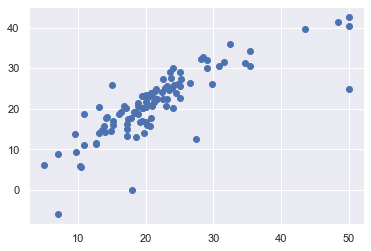

In [128]:
plt.scatter(y_test, y_pred_test); #실제 y_test값 vs. 예측 y_test값


## Stritified Sampling
- 데이터에서 클래스간 불균형이 있을 때에는, 훈련세트와 테스트세트 간의 데이터의 분포가 다르게 나타날 수 있다.
- 이런 경우, 숫자값을 여러 그룹으로 나누고(낮음, 중간, 높음 등), 이 그룹 내에서 랜덤샘플링을 하게되면 두 데이터세트의 결과분포의 우도가 유사해진다. 

In [71]:
df['MEDV'].describe()

count    506.000
mean      22.533
std        9.197
min        5.000
25%       17.025
50%       21.200
75%       25.000
max       50.000
Name: MEDV, dtype: float64

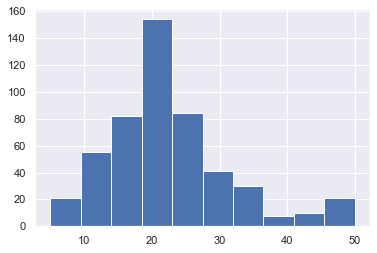

In [72]:
df['MEDV'].hist()

In [73]:
np.ceil(df['MEDV'] / 10).unique()

array([3., 4., 2., 5., 1.])

In [74]:
df['MEDV_category'] = np.ceil(df['MEDV'] / 5)

In [75]:
df['MEDV_category'].value_counts().sort_index()

1.0       2
2.0      22
3.0      73
4.0     118
5.0     167
6.0      40
7.0      36
8.0      17
9.0       9
10.0     22
Name: MEDV_category, dtype: int64

In [76]:
#구간 재편성
df['MEDV_category'].where(df['MEDV_category'] < 6, 6.0, inplace=True) #where cond is false, apply the corresponding value
df['MEDV_category'].where(df['MEDV_category'] > 3, 3.0, inplace=True)
df['MEDV_category'].value_counts().sort_index()

3.0     97
4.0    118
5.0    167
6.0    124
Name: MEDV_category, dtype: int64

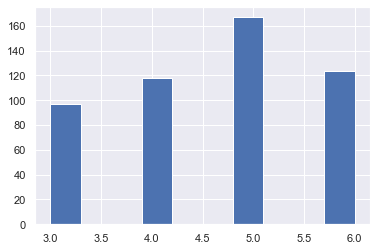

In [77]:
df['MEDV_category'].hist()

In [78]:
strt = StratifiedShuffleSplit(n_splits=5, test_size=.3, random_state=seed)

In [79]:
for train_index, test_index in strt.split(df, df['MEDV_category']):
    strt_X_train, strt_X_test = X.loc[train_index], X.loc[test_index]
    strt_y_train, strt_y_test = y.loc[train_index], y.loc[test_index]

In [80]:
strt_X_train.shape, strt_X_test.shape, strt_y_train.shape, strt_y_test.shape

((354, 13), (152, 13), (354,), (152,))

### Comparison to the simple random sampling

In [81]:
#Linear Regression
model = LinearRegression()
lr = model.fit(strt_X_train, strt_y_train)

In [82]:
# Predicting R2 Score the Train set results
y_pred_train = lr.predict(strt_X_train)
rsquared_train = r2_score(strt_y_train, y_pred_train)

# Predicting R2 Score the Test set results
y_pred_test = lr.predict(strt_X_test)
rsquared_test = r2_score(strt_y_test, y_pred_test)

# Predicting RMSE the Test set results
rmse_score = (np.sqrt(mean_squared_error(strt_y_test, y_pred_test)))

print('R2_score (train): ', rsquared_train)
print('R2_score (test): ', rsquared_test)
print("RMSE: ", rmse_score)


R2_score (train):  0.7406121595731459
R2_score (test):  0.7336454672344548
RMSE:  4.6180981324276225


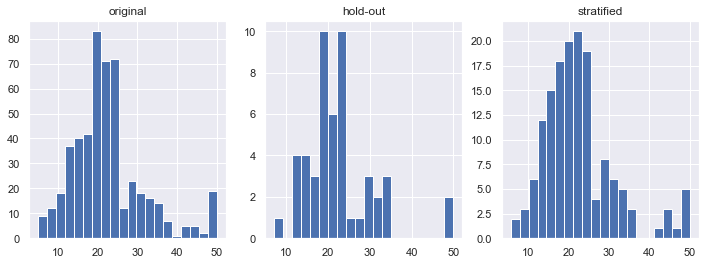

In [83]:
fig, ax = plt.subplots(1,3, figsize=(12,4))

# plt.subplots(131)
ax[0].hist(df['MEDV'], bins=20) 
ax[0].set_title('original')

ax[1].hist(y_test, bins=20)
ax[1].set_title('hold-out')

ax[2].hist(strt_y_test, bins=20)
ax[2].set_title('stratified');

## Leave One Out Cross Validation (LOOCV)

In [145]:
#As a general rule, as k increases, bias decreases and variance increases.
loocv_scores = cross_val_score(model, X, y, cv=10, scoring="r2")

print("R2_score: ", loocv_scores) 
print("Mean R2_score: ", loocv_scores.mean()) 
print("Std R2_score: ", loocv_scores.std())


R2_score:  [ 0.73376082  0.4730725  -1.00631454  0.64113984  0.54766046  0.73640292
  0.37828386 -0.12922703 -0.76843243  0.4189435 ]
Mean R2_score:  0.2025289900605581
Std R2_score:  0.5952960169512388


## K-fold Cross Validation
- 데이터의 수가 적은 경우에는 검증 데이터의 수도 적기 때문에 검증 성능의 신뢰도가 떨어진다. 
- 그렇다고 학습용 데이터의 수를 줄일 수는 없기에 이럴 때는 K-fold CV를 사용한다. 
- 위의 검증방법은 점추정을 해야하지만, 여러 개의 fold의 mean과 std값으로 구간추정이 가능함.
- 경험적으로 보았을 때, k=10이 가장 뛰어난 편향-분산 트레이드오프를 가짐
- k=10일 때 최소 10개의 성과지표(test set)가 생기게 되고 보통은 이 값을 평균을 내어 모델의 성능을 평가함
- (데이터셋이 너무 크면) 느림
- 정확함
- https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

### Drills

In [84]:
# data sample
data = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
# prepare cross validation
kfold = KFold(3, True, 1)
# enumerate splits
for train, test in kfold.split(data):
	print('train: %s, test: %s' % (data[train], data[test]))

train: [0.1 0.4 0.5 0.6], test: [0.2 0.3]
train: [0.2 0.3 0.4 0.6], test: [0.1 0.5]
train: [0.1 0.2 0.3 0.5], test: [0.4 0.6]


### K-fold CV

In [85]:
cv = KFold(n_splits=10, shuffle=True, random_state=seed)

In [86]:
#Linear Regression
model = LinearRegression()


In [ ]:
scores = []

for i, (train_index, test_index) in enumerate(cv.split(df)):

    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Predicting R2 Score
    r2_score_train = r2_score(y_train, y_pred_train)
    r2_score_test = r2_score(y_test, y_pred_test)    

    # Predicting RMSE
    rmse_train = mean_squared_error(y_train, y_pred_train) ** 0.5
    rmse_test = mean_squared_error(y_test, y_pred_test) ** 0.5   

    print("CV: {}".format(i+1))    
    print('R2_score(train): ', r2_score_train)
    print('R2_score(test): ', r2_score_val)

    print("RMSE(train): ", rmse_train)
    print("RMSE(test): ", rmse_val)
    print("\n")    
    
    

### Sklearn API활용

In [88]:
from sklearn import metrics
sorted(metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [140]:
#Split을 10번하여 각각의 테스트셋으로 검증하였을 때의 R-squared
r2_scores = cross_val_score(model, X, y, scoring="r2", cv=cv) 
print("R2_score: ", r2_scores) 
print("Mean R2_score: ", r2_scores.mean()) 
print("Std R2_score: ", r2_scores.std())
# cross_val_predict(model, X, y, cv=cv) 

R2_score:  [0.75981355 0.60908125 0.76975858 0.71639463 0.61663293 0.79789535
 0.76682601 0.79453027 0.74066667 0.59908146]
Mean R2_score:  0.7170680714871449
Std R2_score:  0.07472571063661126


R-squared: 71.7% +/- 7.4%

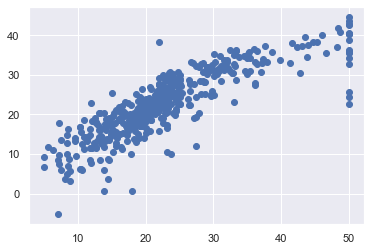

In [90]:
# Make cross validated predictions
y_pred = cross_val_predict(model, X, y, cv=cv)
# accuracy = metrics.r2_score(y, y_pred)
# print("Cross-Predicted Accuracy:", accuracy)
plt.scatter(y, y_pred);

단순 train_test_split을 8:2로 했을 때보다 5배 증가한 데이터 포인트를 확인할 수 있다. <br>
R-sqaured는 59.9%에서 72.3%로 대폭 상승

In [91]:
#Split을 10번하여 각각의 테스트셋으로 검증하였을 때의 RMSE
neg_rmse_scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=cv) 
rmse_scores = np.sqrt(-neg_rmse_scores)

print("RMSE_score: ", rmse_scores) 
print("Mean RMSE_score: ", rmse_scores.mean()) 
print("Std RMSE_score: ", rmse_scores.std())

RMSE_score:  [3.87244792 5.72752342 4.19519692 4.83413146 5.92895882 4.37674407
 4.91331915 4.4212795  4.50201666 5.15830745]
Mean RMSE_score:  4.792992536004599
Std RMSE_score:  0.6256401180671858


RMSE: 4.79 +/- 0.62

# Parameter Tuning

## Random Forest

In [92]:
# X.head()
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [154]:
model = RandomForestRegressor()

In [155]:
#Split을 10번하여 각각의 테스트셋으로 검증하였을 때의 R-squared
r2_scores = cross_val_score(model, X, y, scoring='r2', cv=cv) 
print("R2_score: ", r2_scores) 
print("Mean R2_score: ", r2_scores.mean()) 
print("Std R2_score: ", r2_scores.std())
# cross_val_predict(model, X, y, cv=cv) 

R2_score:  [0.7793598  0.90497311 0.86895896 0.87232007 0.81465323 0.75855074
 0.8900061  0.87980244 0.92608882 0.87532748]
Mean R2_score:  0.857004074432598
Std R2_score:  0.0518759690776419


### Grid Search

In [158]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': ['auto', 'sqrt'], # Number of features to consider at every split
               'max_depth': max_depth, # Maximum number of levels in tree
               'min_samples_split': [2, 5, 10], # Minimum number of samples required to split a node
               'min_samples_leaf': [1, 2, 4], # Minimum number of samples required at each leaf node
               'bootstrap': [True, False]} # Method of selecting samples for training each tree
print(param_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [157]:
%time
grid_search = GridSearchCV(estimator = model, 
                                 param_distributions = param_grid, 
                                 n_iter = 100,
                                 cv=10, 
                                 verbose=10, 
                                 n_jobs = -1,
                                 scoring='neg_mean_squared_error',
                                 return_train_score=True)
grid_search.fit(X, y)

KeyboardInterrupt: 

In [98]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

5.436245540673289 {'max_features': 2, 'n_estimators': 3}
4.786416489015985 {'max_features': 2, 'n_estimators': 10}
5.224874515453917 {'max_features': 2, 'n_estimators': 30}
5.8312364008185265 {'max_features': 4, 'n_estimators': 3}
4.570232931851876 {'max_features': 4, 'n_estimators': 10}
4.500839971866316 {'max_features': 4, 'n_estimators': 30}
5.062313720229141 {'max_features': 6, 'n_estimators': 3}
4.665656988928775 {'max_features': 6, 'n_estimators': 10}
4.438400043877856 {'max_features': 6, 'n_estimators': 30}
5.403885092108567 {'max_features': 8, 'n_estimators': 3}
4.529676148236773 {'max_features': 8, 'n_estimators': 10}
4.4137040825807805 {'max_features': 8, 'n_estimators': 30}
5.954411236657288 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
4.948335304181467 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
5.806330121288534 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
4.722204089453419 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

- 최적: 4.272844717080716 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10} 
- 최적이 범위의 최대값으로 나오면 더 향상될 가능성이 있다; 더 큰 값으로 다시 검색 

In [99]:
best_rmse = np.sqrt(-grid_search.best_score_)
print(f"Best CV RMSE {best_rmse:.5f}")

Best CV RMSE 4.41370


### Randomized Search

In [159]:
%time
random_search = RandomizedSearchCV(estimator = model, 
                                 param_distributions = param_grid, 
                                 n_iter = 100,
                                 cv=10, 
                                 verbose=10, 
                                 random_state=42, 
                                 n_jobs = -1,
                                 scoring='neg_mean_squared_error',
                                 return_train_score=True)
random_search.fit(X, y)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_st...


In [160]:
random_cvres = random_search.cv_results_
for mean_score, params in zip(random_cvres["mean_test_score"], random_cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.565864105114065 {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
4.540367937261447 {'n_estimators': 2000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
4.567692892427031 {'n_estimators': 1200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}
5.805718594085369 {'n_estimators': 2000, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': False}
4.753597686408319 {'n_estimators': 1600, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
4.623717393613877 {'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
4.567040991267584 {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt',

In [162]:
random_search.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=80,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=1400,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [161]:
best_random_search = np.sqrt(-random_search.best_score_)
print(f"Best CV RMSE {best_rmse:.5f}")

Best CV RMSE 4.41370


### Best Fitted Model

In [163]:
best_model = random_search.best_estimator_
best_model

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=80,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=1400,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [164]:
#feature_importances
feature_importances = random_search.best_estimator_.feature_importances_
# features = X.columns.tolist()
sorted(zip(feature_importances.round(4), features), reverse=True)


[(0.2781, 'RM'),
 (0.2621, 'LSTAT'),
 (0.0744, 'INDUS'),
 (0.0735, 'NOX'),
 (0.0697, 'PTRATIO'),
 (0.0618, 'CRIM'),
 (0.0582, 'DIS'),
 (0.0415, 'TAX'),
 (0.0275, 'AGE'),
 (0.0209, 'B'),
 (0.0148, 'RAD'),
 (0.01, 'ZN'),
 (0.0076, 'CHAS')]

### 최적 파라미터로 다시 K-fold CV 시도

In [172]:
#최적 파라미터로 다시 K-fold CV 시도
r2_scores = cross_val_score(best_model, X, y, scoring="r2", cv=cv) 
print("R2_score: ", r2_scores) 
print("Mean R2_score: ", r2_scores.mean()) 
print("Std R2_score: ", r2_scores.std())
# cross_val_predict(model, X, y, cv=cv) 

R2_score:  [0.93136974 0.85938954 0.87900315 0.88370871 0.88128738 0.90490792
 0.91217946 0.90534453 0.91795908 0.79019074]
Mean R2_score:  0.8865340240328763
Std R2_score:  0.03802364159898486


In [166]:
#최적 파라미터로 다시 K-fold CV 시도
rmse_scores = cross_val_score(best_model, X, y, scoring='neg_mean_squared_error', cv=cv) 
print("RMSE_score: ", np.sqrt(-rmse_scores)) 
print("Mean RMSE_score: ", np.sqrt(-rmse_scores).mean()) 
print("Std RMSE_score: ", np.sqrt(-rmse_scores).std())
# cross_val_predict(model, X, y, cv=cv) 

RMSE_score:  [2.09254718 3.39222446 3.03829337 3.09568096 3.31543391 2.97730134
 2.95126531 2.96036889 2.54664989 3.7387381 ]
Mean RMSE_score:  3.0108503422718043
Std RMSE_score:  0.42918228791509516


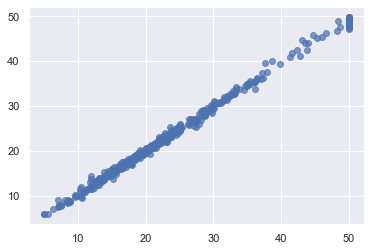

In [179]:
y_pred = best_model.predict(X)
plt.scatter(y, y_pred, alpha=.7);

In [178]:
pd.DataFrame({'Actual': y.values.flatten(), 'Predicted': y_pred.flatten()})

,Actual,Predicted
0,24.0,24.383
1,21.6,21.826
2,34.7,34.532
3,33.4,34.161
4,36.2,35.549
...,...,...
501,22.4,22.139
502,20.6,19.312
503,23.9,24.197
504,22.0,22.460


### Learning Curve

In [180]:
def plot_learning_curves(model, X, y, cv, scoring='neg_mean_squared_error'):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, 
                                                            train_sizes= np.arange(0.1, 1.1, 0.1),
                                                            scoring=scoring,
                                                            cv=cv, 
                                                            n_jobs=-1)
    train_scores_mean = np.sqrt(-train_scores).mean(axis=1)
    train_scores_std =  np.sqrt(-train_scores).std(axis=1)
    test_scores_mean = np.sqrt(-test_scores).mean(axis=1)
    test_scores_std = np.sqrt(-test_scores).std(axis=1)
    
    
    plt.figure(figsize=(12,8))
#     plt.title(f"Learning Curve for {best_model.named_steps['xgbregressor'].__class__.__name__}")
    plt.plot(train_sizes, train_scores_mean, label='train')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha=0.3)
    plt.plot(train_sizes, test_scores_mean, label='test')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, 
             test_scores_mean + test_scores_std, alpha=0.3)
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.legend(loc='best')
    plt.show()

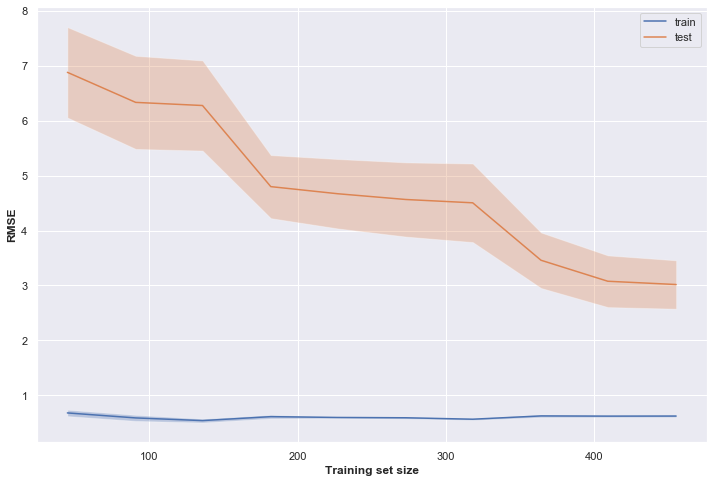

In [181]:
plot_learning_curves(best_model, X, y, cv=cv)

We are slightly overfitting as the test RMSE is a bit higher than the train set RMSE! We should experiment more with regularization and tree pruning to reduce overfitting.

## Regularization

### L1

### L2

## Residual Plot
잔차 vs. 예측변수: 
- 특정한 패턴을 띄면 안됨 
- 데이터 변수간의 내재적 관계가 선형인지 비선형인지 알 수 있음
- whether the resuduals are normally distributed around 0.



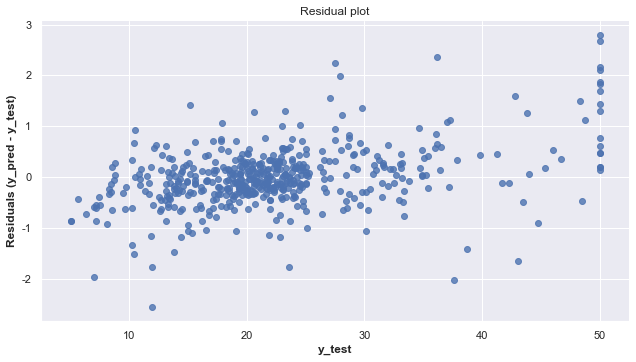

In [173]:
resid_df = pd.DataFrame({'y_test': y, 
                         'Residuals (y_pred - y_test)': y - y_pred})

sns.lmplot(x='y_test', y='Residuals (y_pred - y_test)', data=resid_df, fit_reg=False, aspect=1.8)
plt.title("Residual plot");

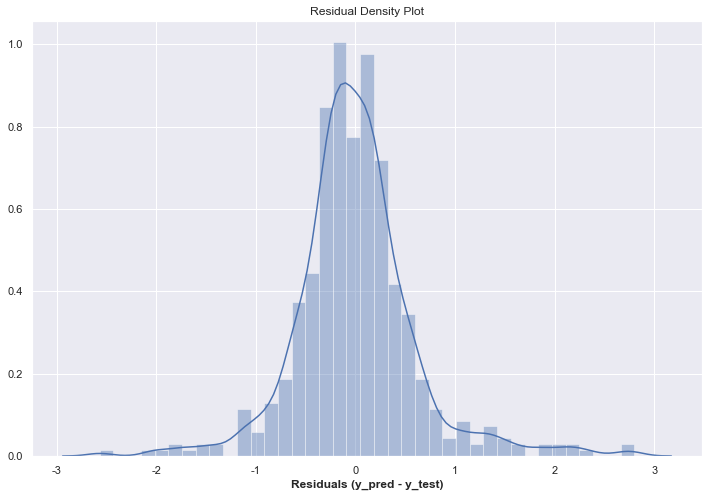

In [174]:
fig, ax =  plt.subplots(figsize=(12,8))
sns.distplot(resid_df['Residuals (y_pred - y_test)'], ax=ax)
plt.title("Residual Density Plot");
    

잔차의 분포가 정규분포를 따라간다; 한 쪽으로 skewed되었으면 다시 튜닝을 해줘야함

# 모델선택: 모델 유형 결정하는 법
1. 가장 해석하기 어렵고 가장 유연한, 부스트 트리나 SVM같은 모델부터 시작한다(정확도,성능이 높음).
2. 완전한 블랙박스는 아닌 MARS, Partial Least Squares(최소자승법), 일반화 가법 모델, Naive Bayesian같은 보다 단순한 모델을 적용한다.
3. 더 복잡한 성능에 어느 정도 근접하면서 가장 단순한 모델을 찾는다(해석력이 높음).